### Estimating the slope of relationship between vegetable consumption and income by simple regression


In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
sns.set()

In [2]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
print(brfss.head())

        SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0  


In [3]:
from scipy.stats import linregress


#### Vegetables as a function of income

In [4]:
subset = brfss.dropna(subset=['INCOME2','_VEGESU1'])

xs=subset['INCOME2']
ys=subset['_VEGESU1']
res = linregress(xs, ys)

print(res)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332, intercept_stderr=0.013196467544093602)


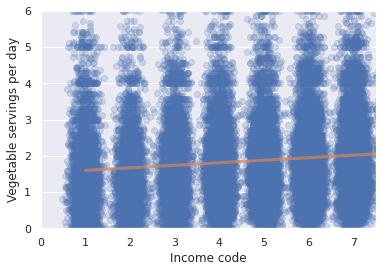

In [5]:
def a1():    
    x_jitter = xs + np.random.normal(0,0.15, len(xs))

    plt.plot(x_jitter, ys, 'o', alpha=0.2)

    fx = np.array([xs.min(), xs.max()])
    fy = res.intercept +res.slope*fx

    a1=plt.plot(fx,fy,'-', alpha=0.7, linewidth=3)
    plt.xlabel('Income code')
    plt.ylabel('Vegetable servings per day')

    plt.ylim([0,6])
    plt.xlim([0,7.5])
a1()
plt.show()


#### Income as a function of vegetables


In [6]:
xs1 = subset['_VEGESU1']
ys1 = subset['INCOME2']
res1= linregress(xs1,ys1)
print(res1)

LinregressResult(slope=0.2049345224314749, intercept=5.450700189148757, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.006190740615220712, intercept_stderr=0.014410966163933081)


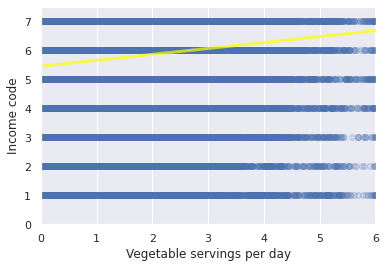

In [7]:
def a2():
    x_jitter1 = xs1 + np.random.normal(0,0.15, len(xs1))
    plt.plot(x_jitter1, ys1, 'o', alpha =0.2)

    fx1=np.array([xs1.min(), xs1.max()])
    fy1=res1.intercept+fx1*res1.slope

    plt.plot(fx1,fy1,'-', alpha=0.7, linewidth=3, color='yellow')

    plt.ylabel('Income code')
    plt.xlabel('Vegetable servings per day')

    plt.xlim([0,6])
    plt.ylim([0,7.5])

a2()
plt.show()


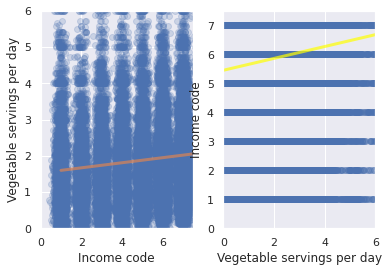

In [8]:
plt.subplot(1,2,1)
a1()
plt.subplot(1,2,2)
a2()
plt.show()

### Multiple regression (Because from the above figure, we see simple regression is not symmetric.)

In [9]:
import statsmodels.formula.api as smf

In [10]:
print(res)
results = smf.ols("INCOME2 ~ _VEGESU1", data = brfss).fit()
results.params

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332, intercept_stderr=0.013196467544093602)


Intercept    5.450700
_VEGESU1     0.204935
dtype: float64